In [2]:
using Luna

In [25]:
diameter = 320e-6
a = diameter/2
gas = :Ar
p = 1.16
flength = 0.6

#λ0 = 266e-9
#τfwhm = 60e-15
#energy = 0.040e-3

λ0 = 400e-9
τfwhm = 50e-15
energy = 0.10e-3

#λlims = (166e-9, 466e-9) # grid wavelength limits
λlims = (300e-9, 500e-9) # grid wavelength limits
trange = 1e-12 # time grid size

modes = 4 # number of modes

4

In [26]:
first_stage = prop_capillary(a, flength, gas, p; λ0, τfwhm, energy, λlims=λlims, trange=trange, modes)

┌ Info: X+Y polarisation not required.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:353
┌ Info: Freq limits 0.60 - 1.00 PHz
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:40
┌ Info: Samples needed: 5995.85, samples: 8192, δt = 166.78 as
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:44
┌ Info: Requested time window: 1000.0 fs, actual time window: 1366.3 fs
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:46
┌ Info: Grid: samples 4096 / 8192, ωmax 9.42e+15 / 1.88e+16
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:78
┌ Info: Using PPT ionisation rate.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:534
┌ Info: Found cached PPT rate for 15.760834782784002 eV, 400.0 nm
└ @ Luna.Ionisation /Users/larsenk/.julia/packages/Luna/An5LJ/src/Ionisation.jl:144
┌ Info: Using radial modal integral.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ

MemoryOutput["simulation_type", "dumps", "meta", "Eω", "prop_capillary_args", "grid", "stats", "z"]

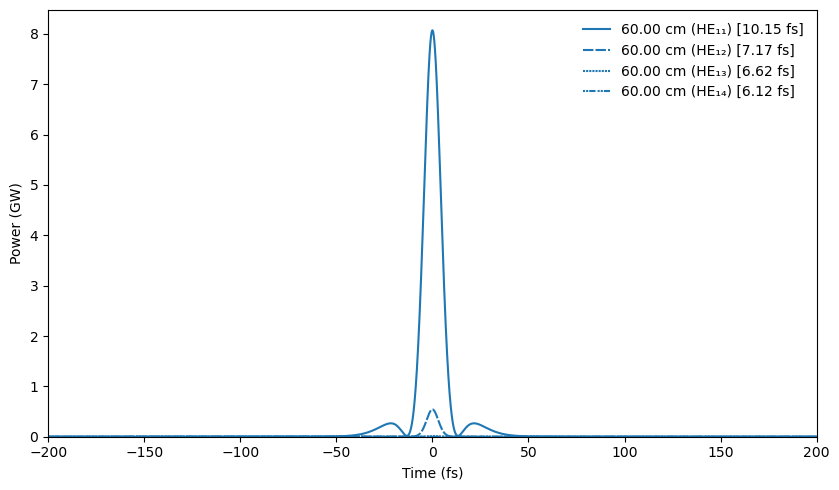

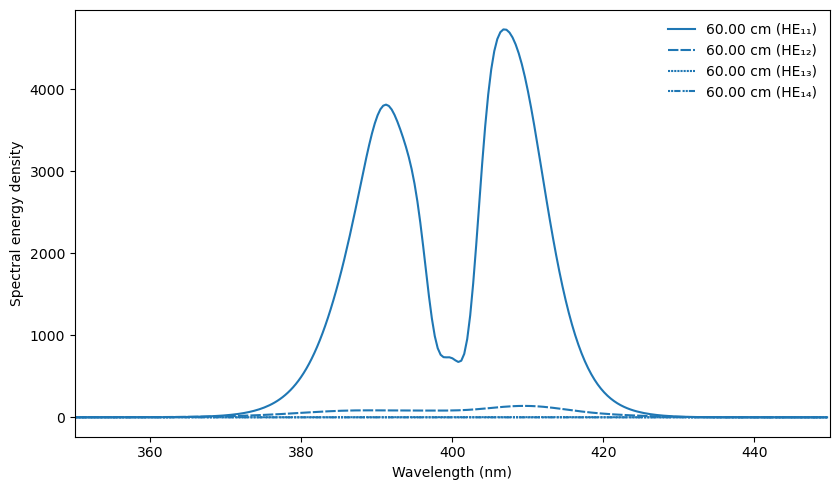

In [27]:
Plotting.time_1D(first_stage; FTL=true, trange =(-200e-15, 200e-15));
#Plotting.spec_1D(first_stage; λrange=(0.246e-6, 0.286e-6), log10=false);
Plotting.spec_1D(first_stage; λrange=(0.350e-6, 0.450e-6), log10=false);

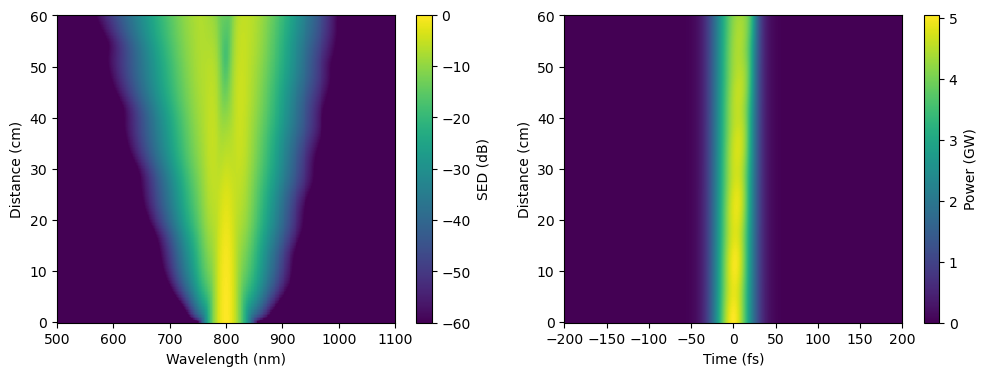

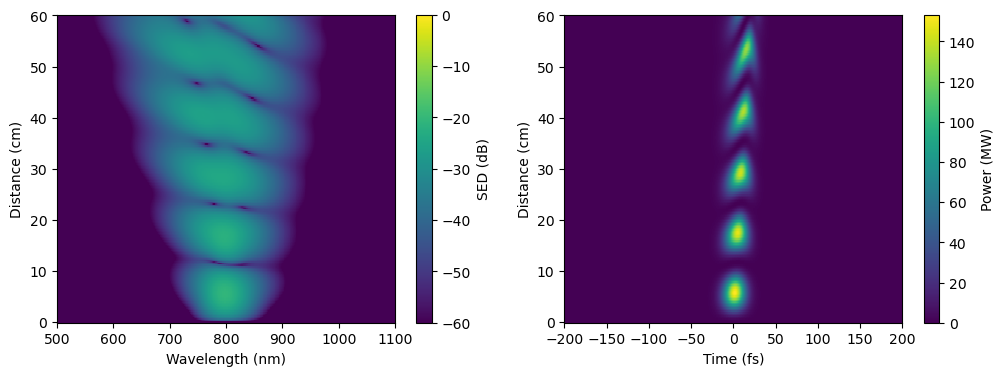

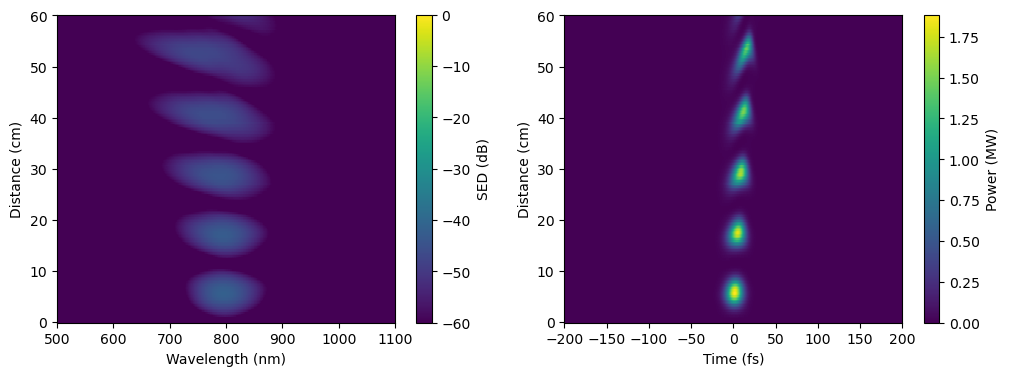

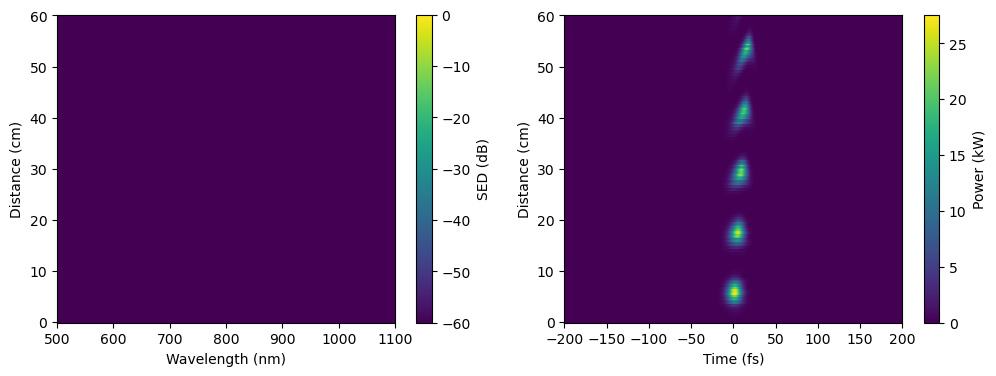

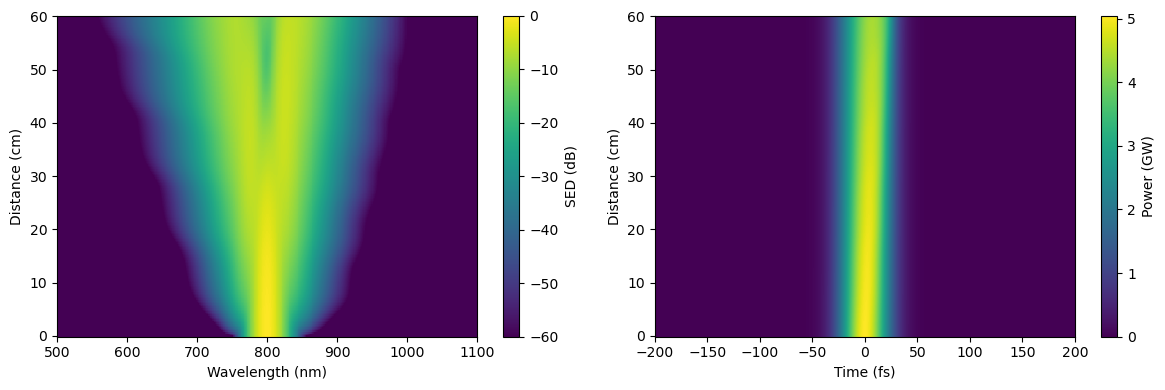

In [6]:
Plotting.prop_2D(first_stage,:λ,trange=(-200e-15, 200e-15),λrange=(0.5e-6, 1.1e-6));

In [5]:
#Plotting.time_1D(first_stage1; FTL=true, trange =(-400e-15, 400e-15));
#Plotting.time_1D(first_stage2; FTL=true, trange =(-400e-15, 400e-15));
#Plotting.time_1D(first_stage3; FTL=true, trange =(-400e-15, 400e-15));
#Plotting.time_1D(first_stage4; FTL=true, trange =(-400e-15, 400e-15));

In [6]:
#Plotting.spec_1D(first_stage1; λrange=(0.5e-6, 1.1e-6), log10=false);
#Plotting.spec_1D(first_stage2; λrange=(0.5e-6, 1.1e-6), log10=false);
#Plotting.spec_1D(first_stage3; λrange=(0.5e-6, 1.1e-6), log10=false);
#Plotting.spec_1D(first_stage4; λrange=(0.5e-6, 1.1e-6), log10=false);

In [7]:
# UFI Chirped Mirror PC2441_RC7
function prop_CMs!(Eω, grid) # mutating function for LunaPulse
    λR = [650,800,950] * 1e-9
    R = [0.99, 0.99, 0.99]
    λGDD = [650,800,950] * 1e-9
    GDD = [-40, -40, -40] * 1e-30
    reflections=4
    λ0=800e-9
    λmin=400e-9
    λmax=1000e-9
    Fields.prop_mirror!(Eω, grid, reflections, λR, R, λGDD, GDD, λ0, λmin, λmax)
end

function prop_CMs(grid, Eω) # non-mutating function for ploting
    Eωout = copy(Eω)
    prop_CMs!(Eωout, grid)
    Eωout
end

function prop!(Eω, grid)
    prop_CMs!(Eω, grid)
    _, Eωopt = Fields.optcomp_material(Eω, grid, :SiO2, λ0, -1e-2, 1e-2)
    Eω .= Eωopt
end

function prop(grid, Eω)
    Eωout = copy(Eω)
    prop!(Eωout, grid)
    Eωout
end

Plotting.time_1D(first_stage; modes=:sum, propagate=prop, trange=(-300e-15,300e-15),bandpass=(650e-9,1000e-9))

LoadError: MethodError: no method matching prop_mirror!(::Array{ComplexF64, 3}, ::Vector{Float64}, ::Int64, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Float64, ::Float64, ::Float64)
[0mClosest candidates are:
[0m  prop_mirror!(::Any, [91m::Luna.Grid.AbstractGrid[39m, ::Any...) at ~/.julia/packages/Luna/An5LJ/src/Fields.jl:687
[0m  prop_mirror!(::Any, ::Any, ::Any, ::Any) at ~/.julia/packages/Luna/An5LJ/src/Fields.jl:676